In [16]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [17]:

df_crypto = pd.read_csv("crypto_data.csv")
df_crypto.head()


,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [18]:
#Discard all cryptocurrencies that are not being traded. In other words, filter for currencies that are currently being traded. Once you have done this, drop the `IsTrading` column from the dataframe.

In [19]:
is_true_df = df_crypto[df_crypto["IsTrading"] == True] 
is_true_df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,True,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,True,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [20]:
is_true_no_trading_info = is_true_df.drop('IsTrading', axis=1)

In [21]:
# Remove all rows that have at least one null value.

In [22]:
is_true_no_na = is_true_no_trading_info.dropna()

In [23]:

 #Filter for cryptocurrencies that have been mined. That is, the total coins mined should be greater than zero.

In [24]:
has_mined = is_true_no_na[is_true_no_na["TotalCoinsMined"] > 0]

In [25]:
no_coin_name = has_mined.drop('CoinName', axis=1)

In [26]:
with_dummies = pd.get_dummies(no_coin_name)
with_dummies

,TotalCoinsMined,Unnamed: 0_1337,Unnamed: 0_1CR,Unnamed: 0_404,Unnamed: 0_42,Unnamed: 0_8BIT,Unnamed: 0_AAC,Unnamed: 0_ABJ,Unnamed: 0_ABS,Unnamed: 0_ABY,...,TotalCoinSupply_91388946,TotalCoinSupply_92000000000,TotalCoinSupply_9354000,TotalCoinSupply_9507271,TotalCoinSupply_9736000,TotalCoinSupply_98000000,TotalCoinSupply_98100000000,TotalCoinSupply_990000000000,TotalCoinSupply_999481516,TotalCoinSupply_9999999
0,4.199995e+01,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.055185e+09,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2.927942e+10,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1.792718e+07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.000000e+09,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,1.493105e+07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
scaled_final_df = StandardScaler().fit_transform(with_dummies)

In [28]:
#In order for your dataset to be comprehensible to a machine learning algorithm, its data should be numeric. Since the coin names do not contribute to the analysis of the data, delete the `CoinName` from the original dataframe.

#Your next step in data preparation is to convert the remaining features with text values, `Algorithm` and `ProofType`, into numerical data. To accomplish this task, use Pandas to create dummy variables. Examine the number of rows and columns of your dataset now. How did they change?

#Standardize your dataset so that columns that contain larger values do not unduly influence the outcome.

 #The dataset was obtained from [CryptoCompare](https://min-api.cryptocompare.com/data/all/coinlist).

In [29]:
pca = PCA(n_components=0.98)
crypto_pca = pca.fit_transform(scaled_final_df)
len(crypto_pca)
#number "columns 441"



532

In [30]:
df_crypto_pca = pd.DataFrame(data=crypto_pca)
df_crypto_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,503,504,505,506,507,508,509,510,511,512
0,-0.306478,-0.134248,-1.275526e-15,-1.833800e-14,0.034075,1.765116,-0.400153,0.105507,-2.213661,-0.508047,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00,-1.029956e-15,1.073380e-15,1.661275e-15,-0.000000e+00
1,-0.286779,-0.135378,-1.912917e-15,-1.777667e-14,0.029073,1.763942,-0.400047,0.105766,-2.216127,-0.508439,...,1.437375e-15,-3.797565e-16,-3.079806e-16,4.686274e-16,3.903001e-16,2.190510e-16,-1.110951e-14,-4.044162e-16,-3.092987e-15,7.075328e-16
2,0.361159,-0.003304,-1.452942e-15,-2.228797e-15,-0.094542,2.909136,-0.481620,-0.442389,-1.633107,0.000252,...,3.016813e-15,-1.079773e-15,5.439520e-16,-1.064217e-15,-6.473674e-15,-1.900075e-15,1.028925e-14,-2.591118e-15,-3.466632e-16,-9.931326e-16
3,-0.287881,-0.256431,-6.811848e-15,-3.112427e-14,0.001154,-1.825765,0.183748,-0.142160,0.426857,0.250633,...,-6.211091e-01,-7.433464e-01,-1.508505e+00,8.202242e-01,7.075987e-01,-1.555153e+00,-1.907362e+00,-9.092179e-01,2.425812e+00,-5.013083e-01
4,-0.136884,-0.256819,-6.263482e-15,-3.622944e-14,-0.049065,-1.761258,0.160765,-0.086250,0.497740,0.093311,...,1.308383e+00,-1.474853e+00,3.380727e-01,6.969072e-01,-2.800738e+00,-1.628132e+00,7.172279e-01,4.992797e-01,-3.520371e+00,7.697033e-01


In [31]:
tsne = TSNE(learning_rate=35)
tsne_features = tsne.fit_transform(df_crypto_pca)
tsne

TSNE(learning_rate=35)

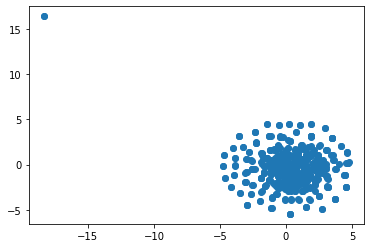

In [32]:
df_crypto_pca['x'] = tsne_features[:,0]
df_crypto_pca['y'] = tsne_features[:,1]
plt.scatter(df_crypto_pca['x'], df_crypto_pca['y'])
plt.show()

In [33]:
inertia = []
k = list(range(1,20))

for i in k:
    km = KMeans(n_clusters=i,random_state = 0)
    km.fit(df_crypto_pca)
    inertia.append(km.inertia_)
    
   

C:\Users\Natalie\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


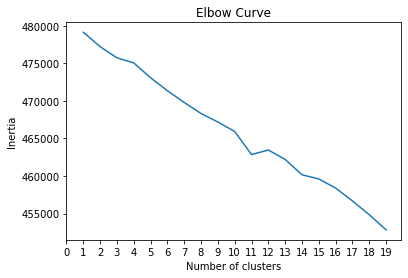

In [34]:
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
    
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(20)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
#The elbow curve reflects what appears to be an elbow bend and that the data can be in some clusters. 

In [36]:
model = KMeans(n_clusters=5, random_state=0)
model.fit(df_crypto_pca)


KMeans(n_clusters=5, random_state=0)

In [37]:
predictions = model.predict(df_crypto_pca)
predictions

array([1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 1, 1, 4, 4,
       4, 1, 1, 1, 4, 4, 4, 1, 4, 1, 4, 1, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 1, 1, 4, 4, 1, 1, 4, 1, 4,
       4, 4, 1, 1, 4, 1, 1, 4, 1, 4, 4, 1, 4, 4, 4, 1, 1, 1, 4, 4, 4, 1,
       1, 4, 4, 4, 4, 1, 4, 4, 1, 1, 4, 1, 4, 4, 4, 1, 1, 4, 1, 4, 1, 4,
       4, 4, 1, 1, 4, 4, 4, 4, 4, 4, 1, 1, 4, 4, 4, 4, 1, 1, 4, 4, 4, 1,
       4, 1, 4, 1, 1, 4, 1, 4, 1, 1, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 1, 1,
       4, 4, 1, 4, 4, 1, 4, 4, 4, 4, 4, 4, 1, 1, 1, 4, 1, 4, 4, 1, 1, 1,
       4, 4, 1, 4, 1, 4, 1, 4, 4, 1, 4, 4, 1, 4, 1, 4, 0, 1, 1, 4, 1, 1,
       4, 4, 4, 1, 4, 1, 4, 4, 1, 1, 1, 1, 3, 1, 4, 1, 1, 4, 4, 1, 1, 4,
       4, 1, 1, 4, 4, 4, 4, 1, 1, 4, 1, 4, 4, 4, 1, 4, 1, 1, 4, 1, 4, 1,
       1, 4, 4, 4, 4, 1, 4, 4, 4, 4, 1, 1, 1, 4, 4, 1, 4, 1, 1, 1, 1, 1,
       4, 4, 4, 4, 4, 4, 1, 1, 4, 4, 4, 4, 1, 4, 4, 4, 4, 1, 1, 1, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 4, 1, 4, 4, 1, 4, 1,

In [3]:
plt.scatter(df_crypto_pca[:,0], df_crypto_pca[:,1], c = model.labels_ )
plt.colorbar()
plt.show()



NameError: name 'plt' is not defined